In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='3d3e4b73-7dfe-4214-b1f6-c2ff248b3666', project_access_token='p-795f8a2044ebb42a4986172450f7ef9cdfe5cc49')
pc = project.project_context


The Battle of the Neighborhoods - Week 2
Part 4 Download and Explore Farmers Market dataset
Download all the dependencies needed

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y
import seaborn as sns

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    ca-certificates-2019.5.15  |                1         134 KB  anaconda
    certifi-2019.6.16          |           py36_1         156 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    certifi:         2019.6.16-py36_1     conda-forge --> 2019.6.16-py36_1 anaconda
    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0                     --> 0.9.0-py36_0     an

In [4]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-8855c19e-99e6-4153-abd3-ae256134eb32',
    'IBM_API_KEY_ID': 'DCE-9cE7s7JcI8hgkd0F3pGeeoBx1hvu0b-YOuq2afE5',
    'ENDPOINT': 'https://s3.ap-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.au-syd.bluemix.net/oidc/token',
    'BUCKET': 'courseracapstone-donotdelete-pr-vcjkjqe40ayz2y',
    'FILE': 'DOHMH_Farmers_Markets.csv'
}

The dataset is downloaded from the website. The link is as given below :

https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2

In [5]:
#import sys
#reload (sys)
#sys.setdefaultencoding("ISO-8859-1")

# Data from website - https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2
my_file = project.get_file("DOHMH_Farmers_Markets.csv")

# Read the CSV data file from the object storage into a pandas DataFrame
my_file.seek(0)
import pandas as pd

FM_NYC=pd.read_csv(my_file, header=0,encoding = 'unicode_escape')
FM_NYC

,Borough,Market Name,Service Category,Service Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Urban Oasis Farmers Market,Farmers Markets & Food Boxes,Farmers Market,681 Clarkson Ave,40.656255,-73.936608,Wednesday,2 - 5:30 p.m.,06/26/2019-11/06/2019,No,No,No,No,"(40.656255, -73.936608)"
1,Staten Island,Staten Island Mall Greenmarket,Farmers Markets & Food Boxes,Farmers Market,Marsh Ave & Ring Rd,40.583804,-74.161245,Saturday,8 a.m. - 3 p.m.,Year-Round,Yes,Yes,No,No,"(40.583804, -74.161245)"
2,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets & Food Boxes,Farmers Market,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
3,Bronx,170 Farm Stand,Farmers Markets & Food Boxes,Farmers Market,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
4,Manhattan,Grass Roots Farmers Market,Farmers Markets & Food Boxes,Farmers Market,"W 145th St bet Edgecombe & Bradhurst Aves, at ...",40.823647,-73.943844,Tuesday &\nSaturday,9 a.m. - 4 p.m.,07/11/2019-11/21/2019,Yes,No,No,No,"(40.823647, -73.943844)"
5,Queens,Brooklyn Grange Farm Stand at Long Island City,Farmers Markets & Food Boxes,Farmers Market,37-18 Northern Blvd (Rooftop),40.752096,-73.925887,Saturday,11 a.m. - 4 p.m.,05/25/19-10/26/19,Yes,No,No,No,"(40.752096, -73.925887)"
6,Bronx,CS211 Go!Healthy Farm Stand,Farmers Markets & Food Boxes,Farmers Market,1919 Prospect Ave,40.843546,-73.889755,Wednesday,2:30 - 5:30 p.m.,07/08/2019- 11/22/2019,Yes,No,No,No,"(40.843546, -73.889755)"
7,Queens,Flushing Greenmarket,Farmers Markets & Food Boxes,Farmers Market,"Kissena Blvd & Maple Ave, at Maple Playground",40.756357,-73.825773,Wednesday,8 a.m. - 3 p.m.,07/03/19-11/27/19,Yes,No,Yes,No,"(40.756357, -73.825773)"
8,Bronx,Harvest Home Jacobi Hospital Farmers Market,Farmers Markets & Food Boxes,Farmers Market,"1400 Pelham Pkwy S, at Eastchester Rd",40.857427,-73.847079,Tuesday & Friday,8 a.m. - 4 p.m.,06/11/2019-11/19/2019,Yes,No,No,No,"(40.857427, -73.847079)"
9,Brooklyn,Marcus Garvey Apartments Farm Stand,Farmers Markets & Food Boxes,Farmers Market,300 Chester St,40.664477,-73.910384,Saturday,11 a.m. - 5 p.m.,NaN,Yes,No,No,No,"(40.664477, -73.910384)"


In [7]:
FM_NYC.head()

,Borough,Market Name,Service Category,Service Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Urban Oasis Farmers Market,Farmers Markets & Food Boxes,Farmers Market,681 Clarkson Ave,40.656255,-73.936608,Wednesday,2 - 5:30 p.m.,06/26/2019-11/06/2019,No,No,No,No,"(40.656255, -73.936608)"
1,Staten Island,Staten Island Mall Greenmarket,Farmers Markets & Food Boxes,Farmers Market,Marsh Ave & Ring Rd,40.583804,-74.161245,Saturday,8 a.m. - 3 p.m.,Year-Round,Yes,Yes,No,No,"(40.583804, -74.161245)"
2,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets & Food Boxes,Farmers Market,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
3,Bronx,170 Farm Stand,Farmers Markets & Food Boxes,Farmers Market,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
4,Manhattan,Grass Roots Farmers Market,Farmers Markets & Food Boxes,Farmers Market,"W 145th St bet Edgecombe & Bradhurst Aves, at ...",40.823647,-73.943844,Tuesday &\nSaturday,9 a.m. - 4 p.m.,07/11/2019-11/21/2019,Yes,No,No,No,"(40.823647, -73.943844)"


Website-https://www.grownyc.org/greenmarketco/foodbox 
GrowNYC's Fresh Food Box Program is a food access initiative that enables under-served communities to purchase fresh, healthy, and primarily regionally grown produce well below traditional retail prices.

A farmers' market is often defined as a public site used by two or more local or regional producers for the direct sale of farm products to consumers. In addition to fresh fruits and vegetables, markets may sell dairy products, fish, meat, baked goods, and other minimally processed foods.

So, in this we will filter farmers' market data and explore it.

In [8]:
FM_NYC.rename(columns={'Service Type':'Service_Type'}, inplace=True)
print(FM_NYC.Service_Type.unique())

['Farmers Market' 'Food Box']


In [9]:
FM_NYC['Service_Type'].value_counts().to_frame()

,Service_Type
Farmers Market,139
Food Box,13


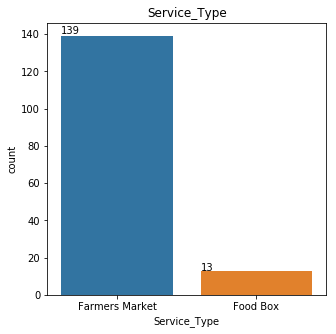

In [10]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Service_Type',data=FM_NYC)
ax.set_title("Service_Type")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
    
plt.show();

In [11]:
# FM_NYC_filtered - Dataset with only Farmers Market
FM_NYC_filtered = FM_NYC[FM_NYC['Service_Type'] == 'Farmers Market'].copy()
FM_NYC_filtered ['Borough'] = FM_NYC_filtered['Borough'].map(lambda x: x.strip())
print(FM_NYC_filtered.shape)
FM_NYC_filtered.head()


(139, 15)


,Borough,Market Name,Service Category,Service_Type,Street Address,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Urban Oasis Farmers Market,Farmers Markets & Food Boxes,Farmers Market,681 Clarkson Ave,40.656255,-73.936608,Wednesday,2 - 5:30 p.m.,06/26/2019-11/06/2019,No,No,No,No,"(40.656255, -73.936608)"
1,Staten Island,Staten Island Mall Greenmarket,Farmers Markets & Food Boxes,Farmers Market,Marsh Ave & Ring Rd,40.583804,-74.161245,Saturday,8 a.m. - 3 p.m.,Year-Round,Yes,Yes,No,No,"(40.583804, -74.161245)"
2,Manhattan,Mount Sinai Hospital Greenmarket,Farmers Markets & Food Boxes,Farmers Market,E 99th St bet Madison & Park Aves,40.789169,-73.952743,Wednesday,8 a.m. - 5 p.m.,06/12/19-11/27/19,Yes,No,No,No,"(40.789169, -73.952743)"
3,Bronx,170 Farm Stand,Farmers Markets & Food Boxes,Farmers Market,E 170th St & Townsend Ave,40.839882,-73.916783,Wednesday,2:30 - 6:30 p.m.,07/10/2019-11/27/2019,Yes,No,No,Yes,"(40.839882, -73.916783)"
4,Manhattan,Grass Roots Farmers Market,Farmers Markets & Food Boxes,Farmers Market,"W 145th St bet Edgecombe & Bradhurst Aves, at ...",40.823647,-73.943844,Tuesday &\nSaturday,9 a.m. - 4 p.m.,07/11/2019-11/21/2019,Yes,No,No,No,"(40.823647, -73.943844)"


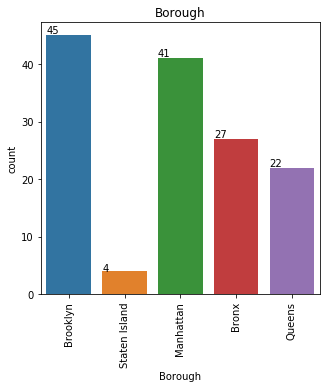

In [12]:
fig,ax = plt.subplots(1, 1, figsize=(5, 5))
sns.countplot(x='Borough',data=FM_NYC_filtered)
ax.set_title("Borough")
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate('', (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))
        ax.set_xticklabels([t.get_text().split("T")[0] for t in ax.get_xticklabels()])

# This sets the yticks "upright" with 0, as opposed to sideways with 90.
plt.xticks(rotation=90) 
plt.show()

Manhattan amd Brooklyn has highest numbers of Farmers Markets

Use geopy library to get the latitude and longitude values of New York City.
The geograpical coordinate of New York City are 40.7308619, -73.9871558

In [13]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


Create a map of New York with Facility name and Borough of Farmers Market superimposed on top.

In [23]:
# create map of New York City using latitude and longitude values
map_markets = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for Latitude, Longitude, Market_Name, Borough in zip(FM_NYC_filtered["Latitude"], FM_NYC_filtered["Longitude"], FM_NYC_filtered["Market Name"], FM_NYC_filtered["Borough"]):
            label = '{}, {}'.format(Market_Name, Borough)
            label = folium.Popup(label, parse_html=True)
            folium.CircleMarker(
                [Latitude, Longitude],
                radius=5,
                popup=label,
                color='orange',
                fill=True,
                fill_color='yellow',
                fill_opacity=0.7,
                parse_html = False).add_to(map_markets)  

map_markets